In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import glob

In [2]:
# Code useful to change format from server to local save.

#file = pd.read_csv("Demo_Data_FixedStim/Demo_13406848.csv")

""" 

new_file = pd.DataFrame(columns=[])

m, n = file.shape

for x in range(m):

    Decoy = file["User_email"][x]
    Item = file["Gender"][x]
    Option_1 = file["Age"][x]
    Option_2 = file["Phantom_condition"][x]
    Option_3 = file["Race"][x]
    Choice = file["User_PID"][x]
    CatchTrials = file["Date"][x]
    Deliberation_RT = file["Survey_ID"][x]
    Choice_RT = file["Ethnicity"][x]
    Too_Slow = file["Coupling"][x]
    
    new_col = pd.DataFrame(data={"Decoy": Decoy, "Item": Item, "Option_1": Option_1, "Option_2": Option_2, "Option_3": Option_3, "Choice": Choice, "CatchTrials": CatchTrials, "Deliberation_RT": Deliberation_RT, "Choice_RT": Choice_RT, "Too_Slow": Too_Slow}, index=range(1))
    new_file = new_file.append(new_col, ignore_index = True)

new_file["Choice"][0] = "00000009"  
new_file.head(20)
"""  
 
    
#file.head()
# miranda.mariana97@hotmail.com




' \n\nnew_file = pd.DataFrame(columns=[])\n\nm, n = file.shape\n\nfor x in range(m):\n\n    Decoy = file["User_email"][x]\n    Item = file["Gender"][x]\n    Option_1 = file["Age"][x]\n    Option_2 = file["Phantom_condition"][x]\n    Option_3 = file["Race"][x]\n    Choice = file["User_PID"][x]\n    CatchTrials = file["Date"][x]\n    Deliberation_RT = file["Survey_ID"][x]\n    Choice_RT = file["Ethnicity"][x]\n    Too_Slow = file["Coupling"][x]\n    \n    new_col = pd.DataFrame(data={"Decoy": Decoy, "Item": Item, "Option_1": Option_1, "Option_2": Option_2, "Option_3": Option_3, "Choice": Choice, "CatchTrials": CatchTrials, "Deliberation_RT": Deliberation_RT, "Choice_RT": Choice_RT, "Too_Slow": Too_Slow}, index=range(1))\n    new_file = new_file.append(new_col, ignore_index = True)\n\nnew_file["Choice"][0] = "00000009"  \nnew_file.head(20)\n'

In [3]:

#new_file.to_csv("Demo_Data_FixedStim/MMM.csv")


In [4]:
def phantom_choices(option_1, option_2, option_3, choice, target_P, competitor_P):
    if((option_1 == "P_A") or (option_2 == "P_A") or (option_3 == "P_A")):
        if(choice == "A"):
            target_P = target_P + 1
        elif(choice == "B"):
            competitor_P = competitor_P + 1
    elif((option_1 == "P_B") or (option_2 == "P_B") or (option_3 == "P_B")):
        if(choice == "B"):
            target_P = target_P + 1
        elif(choice == "A"):
            competitor_P = competitor_P + 1
    return target_P, competitor_P

In [5]:
def getDecoyResponses(df, decoy_type):
    try:
        responses = df["Choice"].value_counts(normalize=True)[decoy_type]
    except KeyError:
        responses = 0
    return responses

def barGraphDecoys(mean_percentage, std_data, title):
    labels = ['Taget', 'Competitor', 'Decoy']
    x = np.arange(len(labels)) 
    y = mean_percentage
    error = std_data
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(labels, y, 0.9, yerr=std_data, capsize=8)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    plt.show()    
    

In [6]:
def simDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "S_A") or (option_2 == "S_A") or (option_3) == "S_A"):
        if(choice == "A"):
            target_count = target_count + 1
        elif (choice == "S_A"):
            decoy_count = decoy_count + 1
        elif (choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    elif((option_1 == "S_B") or (option_2 == "S_B") or (option_3 == "S_B")):
        if(choice == "B"):
            target_count = target_count + 1
        elif (choice == "S_B"):
            decoy_count = decoy_count + 1
        elif (choice== "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    return target_count, competitor_count, decoy_count
        
def comDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "C_A") or (option_2 == "C_A") or (option_3) == "C_A"):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "C_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    elif((option_1 == "C_B") or (option_2 == "C_B") or (option_3) == "C_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "C_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    return target_count, competitor_count, decoy_count

def attDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "A_A") or (option_2 == "A_A") or (option_3 == "A_A")):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "A_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    elif((option_1 == "A_B") or (option_2 == "A_B") or (option_3) == "A_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "A_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    return target_count, competitor_count, decoy_count

In [7]:
def partFreq_Decoy(decoy_df, decoy_type):
    
    freq_name = str(decoy_type + "(num)")
    perc_name = str(decoy_type + "(%)")
    
    freq_df = pd.DataFrame(columns=['PID', 'Target(num)', "Competitor(num)", freq_name, "Target(%)", "Competitor(%)", perc_name])
    
    for idx in Participants_PIDs:
        current_participant = decoy_df[decoy_df["PID"] == idx]
        current_participant = current_participant.reset_index()
        m, n = current_participant.shape 
        
        target_counter = 0
        competitor_counter = 0
        decoy_counter = 0
        
        for x in range(m):
            option_1 = current_participant["Option_1"][x]
            option_2 = current_participant["Option_2"][x]
            option_3 = current_participant["Option_3"][x]
            choice = current_participant["Choice"][x]
            
            if(decoy_type == "Sim_Decoy"):
                target_counter, competitor_counter, decoy_counter = simDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Com_Decoy"):
                target_counter, competitor_counter, decoy_counter = comDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Att_Decoy"):
                target_counter, competitor_counter, decoy_counter = attDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
        
        current_participant_freq = pd.DataFrame(data={'PID': idx, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, freq_name: decoy_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m, perc_name: decoy_counter/m}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df

def itemFreq_Decoy(decoy_df, decoy_type):
    
    freq_name = str(decoy_type + "(num)")
    perc_name = str(decoy_type + "(%)")
    
    item_list = decoy_df["Item"].unique()
    
    freq_df = pd.DataFrame(columns=['Item', 'Target(num)', "Competitor(num)", freq_name, "Target(%)", "Competitor(%)", perc_name])
    
    for item in item_list:
        current_item = decoy_df[decoy_df["Item"] == item]
        current_item = current_item.reset_index()
        m, n = current_item.shape 
        
        target_counter = 0
        competitor_counter = 0
        decoy_counter = 0
        
        for x in range(m):
            option_1 = current_item["Option_1"][x]
            option_2 = current_item["Option_2"][x]
            option_3 = current_item["Option_3"][x]
            choice = current_item["Choice"][x]
            
            if(decoy_type == "Sim_Decoy"):
                target_counter, competitor_counter, decoy_counter = simDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Com_Decoy"):
                target_counter, competitor_counter, decoy_counter = comDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Att_Decoy"):
                target_counter, competitor_counter, decoy_counter = attDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
        #Might add code to get sem.
        current_item_freq = pd.DataFrame(data={'Item': item, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, freq_name: decoy_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m, perc_name: decoy_counter/m}, index=range(1))
        freq_df = freq_df.append(current_item_freq, ignore_index = True)
    return freq_df

def partFreq_PhantomDecoy(decoy_df):
    
    freq_df = pd.DataFrame(columns=['PID', 'Target(num)', "Competitor(num)", "Target(%)", "Competitor(%)"])
    
    participants_list = decoy_df["PID"].unique()
    
    for idx in participants_list:
        current_participant = decoy_df[decoy_df["PID"] == idx]
        current_participant = current_participant.reset_index()
        m, n = current_participant.shape 
        
        target_counter = 0
        competitor_counter = 0
        
        for x in range(m):
            option_1 = current_participant["Option_1"][x]
            option_2 = current_participant["Option_2"][x]
            option_3 = current_participant["Option_3"][x]
            choice = current_participant["Choice"][x]
            
            target_counter, competitor_counter = phantom_choices(option_1, option_2, option_3, choice, target_counter, competitor_counter)
        
        current_participant_freq = pd.DataFrame(data={'PID': idx, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df

def itemFreq_PhantomDecoy(decoy_df):
    
    freq_df = pd.DataFrame(columns=['Item', 'Target(num)', "Competitor(num)", "Target(%)", "Competitor(%)"])
    
    item_list = decoy_df["Item"].unique()
    
    for item in item_list:
        current_item = decoy_df[decoy_df["Item"] == item]
        current_item = current_item.reset_index()
        m, n = current_item.shape 
        
        target_counter = 0
        competitor_counter = 0
        
        for x in range(m):
            option_1 = current_item["Option_1"][x]
            option_2 = current_item["Option_2"][x]
            option_3 = current_item["Option_3"][x]
            choice = current_item["Choice"][x]
            
            target_counter, competitor_counter = phantom_choices(option_1, option_2, option_3, choice, target_counter, competitor_counter)
        
        current_participant_freq = pd.DataFrame(data={'Item': item, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df
            


In [8]:
#decoy_P_df[decoy_P_df["PID"] == "00000007"][0:50]

## Load and Pre-process data

In [9]:
# Now open a directory/folder "/zDemo_data"
fd = os.open("Demo_Data_FixedStim", os.O_RDONLY)

# Use os.fchdir() method to change the dir/folder
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/Decoy/22AY_01_Code/Demo_Data_FixedStim


In [10]:
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Create DataFrame storing the demographic info 
col_names = ['Age', 'Sex', 'Race', 'Ethnicity', 'Date', 'PID', 'SurveyID', 'Email', 'CouplingCondition', 'PhantomCondition']
demographic_info_df = pd.DataFrame(columns=col_names)

for file in csv_files: 
    df = pd.read_csv(file)
    # Check if first row contains demographic info
                      
    if((df["Item"][0] == "Male") or (df["Item"][0] == "Female") or (df["Item"][0] == "Other") or (df["Gender"][0] == "Male")): 
        Age = df["Decoy"][0]
        Sex = df["Item"][0]
        Race = df["Option_1"][0]
        Ethnicity = df["Option_2"][0]
        Date = df["Option_3"][0]
        PID = df["Choice"][0]
        #SurveyID = df["Decoy"][0]
        Email = df["Deliberation_RT"][0]
        CouplingCondition = df["Choice_RT"][0]
        PhantomCondition = df["Too_Slow"][0]

        if((df["Decoy"][0] == "adfgh@me.com") or (df["Decoy"][0] == "ar2ro_gal@hotmail.com") or (df["Decoy"][0] == "A01422782@exatec.tec.mx") or (df["Decoy"][0]=="asantyo@gmail.com") or (df["Decoy"][0]=="acg017@ucsd.edu") or (df["Decoy"][0]=="ojeda.tish@gmail.com") or (df["Decoy"][0]=="reginarock2009@hotmail.com") or (df["Decoy"][0]=="alan.sabast@hotmail.com") or (df["Decoy"][0]=="miranda.mariana97@hotmail.com")):
            Age = df["Option_1"][0]
            Sex = df["Item"][0]
            Race = df["Option_3"][0]
            Ethnicity = df["Choice_RT"][0]
            Date = df["CatchTrials"][0]
            PID = df["Choice"][0]
            #SurveyID = df["Decoy"][0]
            Email = df["Decoy"][0]
            CouplingCondition = df["Too_Slow"][0]
            PhantomCondition = df["Option_2"][0]  
        
        demo_col = pd.DataFrame(data={'Age': Age, 'Sex': Sex, 'Race': Race, 'Ethnicity': Ethnicity, 'Date': Date, 'PID': PID, 'Email': Email, 'CouplingCondition': CouplingCondition,  'PhantomCondition': PhantomCondition}, index=range(1))
        demographic_info_df = demographic_info_df.append(demo_col, ignore_index = True)
    else: 
        print("Error: " + str(file))

demographic_info_df.head(10)

,Age,Sex,Race,Ethnicity,Date,PID,SurveyID,Email,CouplingCondition,PhantomCondition
0,25,Male,Hispanic,Hispanic,03/26/2022,00000008,NaN,alan.sabast@hotmail.com,High coupling,Weakly_desirable
1,23,Female,Hispanic,Hispanic,03/27/2022,00000009,NaN,miranda.mariana97@hotmail.com,Low coupling,Weakly_desirable
2,24,Male,Hispanic,Hispanic,03/23/2022,00000001,NaN,A01422782@exatec.tec.mx,Low coupling,Weakly_desirable
3,28,Male,Hispanic,Hispanic,03/23/2022,00000003,NaN,ar2ro_gal@hotmail.com,High coupling,Weakly_desirable
4,24,Female,Hispanic,Hispanic,03/24/2022,00000006,NaN,ojeda.tish@gmail.com,Low coupling,Highly_desirable
5,24,Male,Hispanic,Hispanic,03/23/2022,00000002,NaN,adfgh@me.com,Low coupling,Undesirable
6,24,Female,Hispanic,Hispanic,03/24/2022,00000004,NaN,acg017@ucsd.edu,Low coupling,Highly_desirable
7,23,Male,Hispanic,Hispanic,03/24/2022,00000005,NaN,asantyo@gmail.com,Low coupling,Highly_desirable
8,24,Female,Hispanic,Hispanic,03/24/2022,00000007,NaN,reginarock2009@hotmail.com,High coupling,Weakly_desirable


In [11]:
#Pre-process data 

all_responses = pd.DataFrame(columns=['Decoy', 'Item', 'Option_1', 'Option_2', 'Option_3', 'Choice', 'CatchTrials', 'Deliberation_RT', 'Choice_RT', 'Too_Slow'])

for file in csv_files: 
    df = pd.read_csv(file)
    PID = df["Choice"][0]
    phantom_condition = df["Too_Slow"][0]
    
    if((df["Decoy"][0] == "adfgh@me.com") or (df["Decoy"][0] == "ar2ro_gal@hotmail.com") or (df["Decoy"][0] == "A01422782@exatec.tec.mx") or (df["Decoy"][0]=="asantyo@gmail.com") or (df["Decoy"][0]=="acg017@ucsd.edu") or (df["Decoy"][0]=="ojeda.tish@gmail.com") or (df["Decoy"][0]=="reginarock2009@hotmail.com") or (df["Decoy"][0]=="alan.sabast@hotmail.com") or (df["Decoy"][0]=="miranda.mariana97@hotmail.com")):
        phantom_condition = df["Option_2"][0] 
    
    #Check shape of file
    n, m = df.shape
    for x in range(n):
        #Check if each row is blank or has no info, if so, then drop
        if(df["Item"][x]=="Male" or df["Item"][x]=="Female" or df["Item"][x]=="Other" or pd.isna(df["Item"][x])):
            df.drop([x])
        else: 
            df["PID"] = PID
            df["PhantomCondition"] = phantom_condition
            all_responses = all_responses.append(df.iloc[[x]], ignore_index = True)

print(all_responses.shape)
all_responses.head(10)

(909, 13)


,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,Unnamed: 0,PID,PhantomCondition
0,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,2.0,00000008,Weakly_desirable
1,C,Smart lock,B,A,C_B,C_B,NaN,10000,1441.8,0,5.0,00000008,Weakly_desirable
2,P,Oximeter,A,P_A,B,A,NaN,10000,450.7,0,6.0,00000008,Weakly_desirable
3,F,Surge protector,C,A,B,B,NaN,10000,974.7,0,7.0,00000008,Weakly_desirable
4,A,Tire inflator,A_B,B,A,B,NaN,10000,669,0,8.0,00000008,Weakly_desirable
5,S,Headlight bulbs,S_B,B,A,A,NaN,10000,1081.5,0,9.0,00000008,Weakly_desirable
6,C,Lawn mower,B,C_A,A,C_A,NaN,10000,1825.9,0,10.0,00000008,Weakly_desirable
7,F,Sunscreen,B,C,A,C,NaN,10000,2409.6,0,11.0,00000008,Weakly_desirable
8,S,Metal detector,B,A,S_A,B,NaN,10000,403.8,0,12.0,00000008,Weakly_desirable
9,P,Air purifier,P_A,B,A,B,NaN,10000,2468.5,0,13.0,00000008,Weakly_desirable


In [12]:
# Pre process RT data, turn 'str' to NaN, then remove NaN.
all_responses["Choice_RT"] = pd.to_numeric(all_responses["Choice_RT"], errors='coerce')
RT_df = all_responses["Choice_RT"].dropna()

In [13]:
Participants_PIDs = all_responses["PID"].unique()
total_n = int(len(Participants_PIDs))
print(Participants_PIDs)
print("Total number of particiants: " + str(total_n))

['00000008' '00000009' '00000001' '00000003' '00000006' '00000002'
 '00000004' '00000005' '00000007']
Total number of particiants: 9


## Participants RT

In [14]:
# Checking mean response time

rt_mean = RT_df.mean()
rt_mean = rt_mean/1000

print("Group mean response time: " + str(round(rt_mean, 2)) + " sec.")

Group mean response time: 1.74 sec.


In [15]:
# Checking mean response time per participant 

group_rt_df = pd.DataFrame(columns=['PID', 'Mean_RT (sec)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    participant_rt = all_responses[all_responses["PID"] == x]["Choice_RT"].apply(float).mean()/1000
    participant_rt = round(participant_rt, 2)
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Mean_RT (sec)': participant_rt}, index=range(1))
    group_rt_df = group_rt_df.append(current_p_df, ignore_index = True)

group_rt_df.head(10)

,PID,Mean_RT (sec)
0,00000008,1.51
1,00000009,1.91
2,00000001,0.70
3,00000003,2.17
4,00000006,1.00
5,00000002,3.86
6,00000004,0.86
7,00000005,2.02
8,00000007,1.67


## Catch Trials 

In [16]:
# Checking filler/catch trials work as expected.

filler_total = all_responses[all_responses["Decoy"] =="F"]["Choice"].count()
filler_catch = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("C").sum()
filler_miss = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("B").sum() + all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("A").sum()
print("Total number of catch trials: " + str(filler_total))
print("Total 'catch trials' correct: " + str(filler_catch))
print("Total 'catch trials' incorrect': " + str(filler_miss))

print("\n Correct trials avg: " + str(round(filler_catch/filler_total, 2)*100) + "%")
print("\n Incorrect trials avg: " + str(round(filler_miss/filler_total, 2)*100) + "%")


Total number of catch trials: 180
Total 'catch trials' correct: 134
Total 'catch trials' incorrect': 46

 Correct trials avg: 74.0%

 Incorrect trials avg: 26.0%


In [17]:
# Each participants catch trials info

group_catch_df = pd.DataFrame(columns=['PID', 'Correct(num)', 'Incorrect(num)', 'Correct(%)', 'Incorrect(%)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    current_part_catch_df = all_responses[all_responses["PID"] == x]
    current_part_catch_df = current_part_catch_df[current_part_catch_df["Decoy"] =="F"]
    current_part_total_trials = current_part_catch_df["Choice"].count()
    current_part_catch_freq = current_part_catch_df["Choice"].str.count("C").sum()
    current_part_miss_freq = current_part_catch_df["Choice"].str.count("B").sum() + current_part_catch_df["Choice"].str.count("A").sum()
    current_part_catch_perc = current_part_catch_freq/current_part_total_trials
    current_part_miss_perc = current_part_miss_freq/current_part_total_trials
    
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Correct(num)': current_part_catch_freq, "Incorrect(num)": current_part_miss_freq, "Correct(%)": current_part_catch_perc*100, "Incorrect(%)": current_part_miss_perc*100}, index=range(1))
    group_catch_df = group_catch_df.append(current_p_df, ignore_index = True)
group_catch_df.head(10)

# Change to correct and error
# Change perc *100 
# change freq to num

,PID,Correct(num),Incorrect(num),Correct(%),Incorrect(%)
0,00000008,10,10,50.0,50.0
1,00000009,13,7,65.0,35.0
2,00000001,18,2,90.0,10.0
3,00000003,11,9,55.0,45.0
4,00000006,18,2,90.0,10.0
5,00000002,19,1,95.0,5.0
6,00000004,18,2,90.0,10.0
7,00000005,13,7,65.0,35.0
8,00000007,14,6,70.0,30.0


In [18]:
catch_items_df = all_responses[all_responses["Decoy"] =="F"]
catch_summary_df = pd.DataFrame(columns=['Item', 'Correct(num)', 'Incorrect(num)', 'Correct(%)', 'Incorrect(%)', "Times_Encountered"])

catch_items_list = catch_items_df["Item"].unique()

for item in catch_items_list: 
    
    current_item_catch_df = catch_items_df[catch_items_df["Item"] == item]
    times_encountered = current_item_catch_df["Choice"].count()
    current_item_catch_freq = current_item_catch_df["Choice"].str.count("C").sum()
    current_item_miss_freq = current_item_catch_df["Choice"].str.count("B").sum() + current_item_catch_df["Choice"].str.count("A").sum()
    current_item_catch_perc = current_item_catch_freq/times_encountered
    current_item_miss_perc = current_item_miss_freq/times_encountered
    
    current_item_catch_perc = np.round(current_item_catch_perc, 2)
    current_item_miss_perc = np.round(current_item_miss_perc, 2)
    
    current_i_df = pd.DataFrame(data={'Item': item, 'Correct(num)': current_item_catch_freq, "Incorrect(num)": current_item_miss_freq, "Correct(%)": current_item_catch_perc*100, "Incorrect(%)": current_item_miss_perc*100, "Times_Encountered":times_encountered}, index=range(1))
    catch_summary_df = catch_summary_df.append(current_i_df, ignore_index = True)

catch_summary_df.head(20)

,Item,Correct(num),Incorrect(num),Correct(%),Incorrect(%),Times_Encountered
0,Surge protector,6,6,50.0,50.0,12
1,Sunscreen,3,3,50.0,50.0,6
2,Stun gun,6,2,75.0,25.0,8
3,Microwave,10,2,83.0,17.0,12
4,Automatic pet feeder,6,4,60.0,40.0,10
5,Protein powder,11,3,79.0,21.0,14
6,Baby rocker,14,0,100.0,0.0,14
7,Pepper spray,8,3,73.0,27.0,11
8,Outdoor solar lights,9,2,82.0,18.0,11
9,Garbage disposal,5,2,71.0,29.0,7


## Similarity Decoy

Group Mean Target: 34.0%
Group Mean Competitor: 27.0%
Group Mean Decoy: 39.0%

Target sem: 0.04%
Competitor sem: 0.03%
Decoy sem: 0.05%


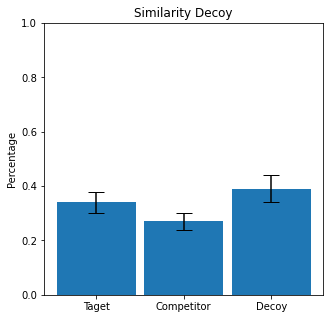

In [19]:
decoy_S_df = all_responses[all_responses["Decoy"] == "S"]
decoy_S_df = decoy_S_df.reset_index()

group_sim_freq_df = partFreq_Decoy(decoy_S_df, "Sim_Decoy")

target_S_mean = round(group_sim_freq_df["Target(%)"].mean(), 2)
competitor_S_mean = round(group_sim_freq_df["Competitor(%)"].mean(), 2)
decoy_S_mean = round(group_sim_freq_df["Sim_Decoy(%)"].mean(), 2)

target_S_std = group_sim_freq_df["Target(%)"].std()
competitor_S_std = group_sim_freq_df["Competitor(%)"].std()
decoy_S_std = group_sim_freq_df["Sim_Decoy(%)"].std()

target_S_sem = round((target_S_std/np.sqrt(total_n)), 2)
competitor_S_sem = round((competitor_S_std/np.sqrt(total_n)), 2)
decoy_S_sem = round((decoy_S_std/np.sqrt(total_n)), 2)

print("Group Mean Target: " + str(target_S_mean*100) + "%")
print("Group Mean Competitor: " + str(competitor_S_mean*100) + "%")
print("Group Mean Decoy: " + str(decoy_S_mean*100) + "%")

# Do I need the '%' sign?
print("\nTarget sem: " + str(target_S_sem) + "%")
print("Competitor sem: " + str(competitor_S_sem) + "%")
print("Decoy sem: " + str(decoy_S_sem) + "%")

sim_decoy_mean_perc = np.array([target_S_mean, competitor_S_mean, decoy_S_mean])
sim_decoy_sems = np.array([target_S_sem, competitor_S_sem, decoy_S_sem])

barGraphDecoys(sim_decoy_mean_perc, sim_decoy_sems, 'Similarity Decoy')

In [20]:
#Similarity Decoy (Inv. part. data)
group_sim_freq_df.head(10)

,PID,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
0,00000008,7,9,4,0.35,0.45,0.20
1,00000009,7,5,8,0.35,0.25,0.40
2,00000001,11,6,3,0.55,0.30,0.15
3,00000003,6,6,8,0.30,0.30,0.40
4,00000006,4,4,12,0.20,0.20,0.60
5,00000002,8,5,7,0.40,0.25,0.35
6,00000004,7,3,10,0.35,0.15,0.50
7,00000005,2,6,12,0.10,0.30,0.60
8,00000007,9,4,7,0.45,0.20,0.35


## Compromise Decoy

Group Mean Target: 0.52%
Group Mean Competitor: 0.27%
Group Mean Decoy: 0.21%

Target sem: 0.06%
Competitor sem: 0.02%
Decoy sem: 0.05%


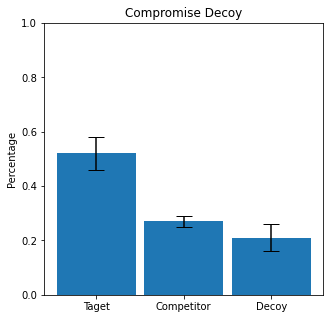

In [21]:
decoy_C_df = all_responses[all_responses["Decoy"] == "C"]
decoy_C_df = decoy_C_df.reset_index()

group_com_freq_df = partFreq_Decoy(decoy_C_df, "Com_Decoy")

target_C_mean = round(group_com_freq_df["Target(%)"].mean(), 2)
competitor_C_mean = round(group_com_freq_df["Competitor(%)"].mean(), 2)
decoy_C_mean = round(group_com_freq_df["Com_Decoy(%)"].mean(), 2)

target_C_std = group_com_freq_df["Target(%)"].std()
competitor_C_std = group_com_freq_df["Competitor(%)"].std()
decoy_C_std = group_com_freq_df["Com_Decoy(%)"].std()

target_C_sem = round((target_C_std/np.sqrt(total_n)), 2)
competitor_C_sem = round((competitor_C_std/np.sqrt(total_n)), 2)
decoy_C_sem = round((decoy_C_std/np.sqrt(total_n)), 2)

print("Group Mean Target: " + str(target_C_mean) + "%")
print("Group Mean Competitor: " + str(competitor_C_mean) + "%")
print("Group Mean Decoy: " + str(decoy_C_mean) + "%")

print("\nTarget sem: " + str(target_C_sem) + "%")
print("Competitor sem: " + str(competitor_C_sem) + "%")
print("Decoy sem: " + str(decoy_C_sem) + "%")

com_decoy_mean_perc = np.array([target_C_mean, competitor_C_mean, decoy_C_mean])
com_decoy_sems = np.array([target_C_sem, competitor_C_sem, decoy_C_sem])

barGraphDecoys(com_decoy_mean_perc, com_decoy_sems, 'Compromise Decoy')

In [22]:
group_com_freq_df.head(10)

,PID,Target(num),Competitor(num),Com_Decoy(num),Target(%),Competitor(%),Com_Decoy(%)
0,00000008,9,6,5,0.45,0.30,0.25
1,00000009,11,4,5,0.55,0.20,0.25
2,00000001,10,6,4,0.50,0.30,0.20
3,00000003,6,7,7,0.30,0.35,0.35
4,00000006,16,4,0,0.80,0.20,0.00
5,00000002,13,6,1,0.65,0.30,0.05
6,00000004,11,4,5,0.55,0.20,0.25
7,00000005,13,5,2,0.65,0.25,0.10
8,00000007,4,7,9,0.20,0.35,0.45


## Attraction Decoy

Group Mean Target: 0.56%
Group Mean Competitor: 0.38%
Group Mean Decoy: 0.06%

Target sem: 0.04%
Competitor sem: 0.04%
Decoy sem: 0.01%


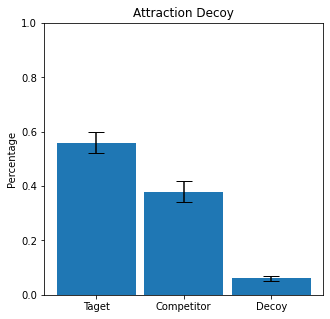

In [23]:
decoy_A_df = all_responses[all_responses["Decoy"] == "A"]
decoy_A_df = decoy_A_df.reset_index()

group_att_freq_df = partFreq_Decoy(decoy_A_df, "Att_Decoy")

target_A_mean = round(group_att_freq_df["Target(%)"].mean(), 2)
competitor_A_mean = round(group_att_freq_df["Competitor(%)"].mean(), 2)
decoy_A_mean = round(group_att_freq_df["Att_Decoy(%)"].mean(), 2)

target_A_std = group_att_freq_df["Target(%)"].std()
competitor_A_std = group_att_freq_df["Competitor(%)"].std()
decoy_A_std = group_att_freq_df["Att_Decoy(%)"].std()

target_A_sem = round((target_A_std/np.sqrt(total_n)), 2)
competitor_A_sem = round((competitor_A_std/np.sqrt(total_n)), 2)
decoy_A_sem = round((decoy_A_std/np.sqrt(total_n)), 2)

print("Group Mean Target: " + str(target_A_mean) + "%")
print("Group Mean Competitor: " + str(competitor_A_mean) + "%")
print("Group Mean Decoy: " + str(decoy_A_mean) + "%")

print("\nTarget sem: " + str(target_A_sem) + "%")
print("Competitor sem: " + str(competitor_A_sem) + "%")
print("Decoy sem: " + str(decoy_A_sem) + "%")

att_decoy_mean_perc = np.array([target_A_mean, competitor_A_mean, decoy_A_mean])
att_decoy_sems = np.array([target_A_sem, competitor_A_sem, decoy_A_sem])

barGraphDecoys(att_decoy_mean_perc, att_decoy_sems, 'Attraction Decoy')

In [24]:
group_att_freq_df.head(10)

,PID,Target(num),Competitor(num),Att_Decoy(num),Target(%),Competitor(%),Att_Decoy(%)
0,00000008,10,10,0,0.50,0.50,0.00
1,00000009,10,9,1,0.50,0.45,0.05
2,00000001,12,7,1,0.60,0.35,0.05
3,00000003,11,8,1,0.55,0.40,0.05
4,00000006,13,6,1,0.65,0.30,0.05
5,00000002,14,4,2,0.70,0.20,0.10
6,00000004,13,5,2,0.65,0.25,0.10
7,00000005,7,11,2,0.35,0.55,0.10
8,00000007,11,9,0,0.55,0.45,0.00


## Phantom Decoys

### Highly Desirable Group

In [25]:
# Phantom Decoy: Highly Desirable
decoy_P_df = all_responses[all_responses["Decoy"] == "P"]
decoy_P_df = decoy_P_df.reset_index()

decoy_P_HD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"]

total_n = decoy_P_HD_df["PID"].unique()
total_n = int(len(total_n))

decoy_P_HD_freq_df = partFreq_PhantomDecoy(decoy_P_HD_df)

target_P_HD_mean = round(decoy_P_HD_freq_df["Target(%)"].mean(), 2)
competitor_P_HD_mean = round(decoy_P_HD_freq_df["Competitor(%)"].mean(), 2)

target_P_HD_std = decoy_P_HD_freq_df["Target(%)"].std()
competitor_P_HD_std = decoy_P_HD_freq_df["Competitor(%)"].std()

target_P_HD_sem = round((target_P_HD_std/np.sqrt(total_n)), 2)
competitor_P_HD_sem = round((competitor_P_HD_std/np.sqrt(total_n)), 2)

print("Target mean: " + str(target_P_HD_mean) + "%")
print("Competitor mean: " + str(competitor_P_HD_mean) + "%")

print("\nTarget sem: " + str(target_P_HD_sem) + "%")
print("Competitor sem: " + str(competitor_P_HD_sem) + "%")

decoy_P_HD_freq_df.head(10)

Target mean: 0.52%
Competitor mean: 0.48%

Target sem: 0.04%
Competitor sem: 0.04%


,PID,Target(num),Competitor(num),Target(%),Competitor(%)
0,00000006,12,8,0.60,0.40
1,00000004,10,10,0.50,0.50
2,00000005,9,11,0.45,0.55


### Weakly Desirable Group

In [26]:
# Phantom Decoy: Weakly Desirable
decoy_P_WD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"]

decoy_P_WD_freq_df = partFreq_PhantomDecoy(decoy_P_WD_df)

total_n = decoy_P_WD_freq_df["PID"].unique()
total_n = int(len(total_n))

target_P_WD_mean = round(decoy_P_WD_freq_df["Target(%)"].mean(), 2)
competitor_P_WD_mean = round(decoy_P_WD_freq_df["Competitor(%)"].mean(), 2)

target_P_WD_std = decoy_P_WD_freq_df["Target(%)"].std()
competitor_P_WD_std = decoy_P_WD_freq_df["Competitor(%)"].std()

target_P_WD_sem = round((target_P_WD_std/np.sqrt(total_n)), 2)
competitor_P_WD_sem = round((competitor_P_WD_std/np.sqrt(total_n)), 2)

print("Target mean: " + str(target_P_WD_mean) + "%")
print("Competitor mean: " + str(competitor_P_WD_mean) + "%")

print("\nTarget sem: " + str(target_P_WD_sem) + "%")
print("Competitor sem: " + str(competitor_P_WD_sem) + "%")

decoy_P_WD_freq_df.head(10)

Target mean: 0.59%
Competitor mean: 0.41%

Target sem: 0.03%
Competitor sem: 0.03%


,PID,Target(num),Competitor(num),Target(%),Competitor(%)
0,00000008,12,8,0.60,0.40
1,00000009,12,8,0.60,0.40
2,00000001,11,9,0.55,0.45
3,00000003,10,10,0.50,0.50
4,00000007,14,6,0.70,0.30


### Undesirable Group

In [27]:
# Phantom Decoy: Undesirable
decoy_P_U_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"]

decoy_P_U_freq_df = partFreq_PhantomDecoy(decoy_P_U_df)

total_n = decoy_P_U_freq_df["PID"].unique()
total_n = int(len(total_n))

target_P_U_mean = round(decoy_P_U_freq_df["Target(%)"].mean(), 2)
competitor_P_U_mean = round(decoy_P_U_freq_df["Competitor(%)"].mean(), 2)

target_P_U_std = decoy_P_U_freq_df["Target(%)"].std()
competitor_P_U_std = decoy_P_U_freq_df["Competitor(%)"].std()

target_P_U_sem = round((competitor_P_U_std/np.sqrt(total_n)), 2)
competitor_P_U_sem = round((competitor_P_U_std/np.sqrt(total_n)), 2)

print("Target mean: " + str(target_P_U_mean) + "%")
print("Competitor mean: " + str(competitor_P_U_mean) + "%")

print("\nTarget sem: " + str(target_P_U_sem) + "%")
print("Competitor sem: " + str(competitor_P_U_sem) + "%")

decoy_P_U_freq_df.head(10)

Target mean: 0.75%
Competitor mean: 0.25%

Target sem: nan%
Competitor sem: nan%


,PID,Target(num),Competitor(num),Target(%),Competitor(%)
0,00000002,15,5,0.75,0.25


### Displaying All Phantoms

/Users/luisalvarez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


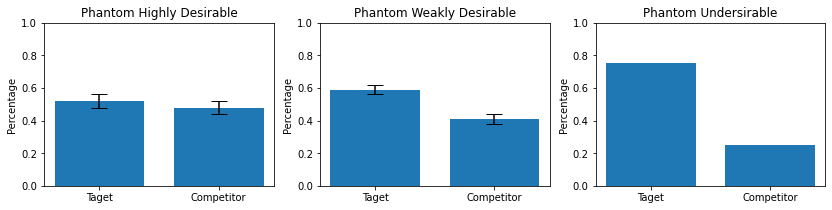

In [28]:
labels = ['Taget', 'Competitor']

x = np.arange(len(labels))

y1 = np.array([target_P_HD_mean, competitor_P_HD_mean])
y2 = np.array([target_P_WD_mean, competitor_P_WD_mean])
y3 = np.array([target_P_U_mean, competitor_P_U_mean])

error1 = np.array([target_P_HD_sem, competitor_P_HD_sem])
error2 = np.array([target_P_WD_sem, competitor_P_WD_sem])
error3 = np.array([target_P_U_sem, competitor_P_U_sem])

ys = np.array([y1, y2, y3])
errors = np.array([error1, error2, error3])
titles = ["Phantom Highly Desirable", "Phantom Weakly Desirable", "Phantom Undersirable"]

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
                       
for x in range(3):
    ax[x].bar(labels, ys[x], 0.75, yerr=errors[x], capsize=8)
    ax[x].set_ylim(0, 1)
    ax[x].set_ylabel('Percentage')
    ax[x].set_title(titles[x])
                                    
plt.show()

## Inspecting Individual Items

### Similarity Decoy

In [29]:
decoy_S_TargetA_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_A') | decoy_S_df['Option_2'].str.contains('S_A') | decoy_S_df['Option_3'].str.contains('S_A')]
decoy_S_TargetB_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_B') | decoy_S_df['Option_2'].str.contains('S_B') | decoy_S_df['Option_3'].str.contains('S_B')]

decoy_S_Items_TargetA_df = itemFreq_Decoy(decoy_S_TargetA_df, "Sim_Decoy")
decoy_S_Items_TargetB_df = itemFreq_Decoy(decoy_S_TargetB_df, "Sim_Decoy")

item_list = decoy_S_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Sim_items_targets_A = np.array([])
Sim_items_competitors_A = np.array([])
Sim_items_decoys_A = np.array([])

Sim_items_targets_B = np.array([])
Sim_items_competitors_B = np.array([])
Sim_items_decoys_B = np.array([])

Sim_items_targets_A_sem = np.array([])
Sim_items_competitors_A_sem = np.array([])
Sim_items_decoys_A_sem = np.array([])

Sim_items_targets_B_sem = np.array([])
Sim_items_competitors_B_sem = np.array([])
Sim_items_decoys_B_sem = np.array([])

for item in item_list:
    
    current_item_A = decoy_S_Items_TargetA_df[decoy_S_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_S_Items_TargetB_df[decoy_S_Items_TargetB_df["Item"] == item]
    
    Sim_items_targets_A = np.append(Sim_items_targets_A, current_item_A["Target(%)"])
    Sim_items_competitors_A = np.append(Sim_items_competitors_A, current_item_A["Competitor(%)"])
    Sim_items_decoys_A = np.append(Sim_items_decoys_A, current_item_A["Sim_Decoy(%)"])
    
    Sim_items_targets_B = np.append(Sim_items_targets_B, current_item_B["Target(%)"])
    Sim_items_competitors_B = np.append(Sim_items_competitors_B, current_item_B["Competitor(%)"])
    Sim_items_decoys_B = np.append(Sim_items_decoys_B, current_item_B["Sim_Decoy(%)"])
    
    target_P_WD_std = decoy_P_WD_freq_df["Target(%)"].std()
    competitor_P_WD_std = decoy_P_WD_freq_df["Competitor(%)"].std()

    target_P_WD_sem = round((target_P_WD_std/np.sqrt(total_n)), 2)
    competitor_P_WD_sem = round((competitor_P_WD_std/np.sqrt(total_n)), 2)
    

In [30]:
decoy_S_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
0,Metal detector,1,6,2,0.111111,0.666667,0.222222
1,Vacuum,0,1,8,0.000000,0.111111,0.888889
2,Night light,2,2,5,0.222222,0.222222,0.555556
3,Air mattress,4,2,3,0.444444,0.222222,0.333333
4,Baby high chair,0,6,3,0.000000,0.666667,0.333333
5,Headlight bulbs,2,4,3,0.222222,0.444444,0.333333
6,Air Fryer Oven,2,3,4,0.222222,0.333333,0.444444
7,Security camera,3,2,4,0.333333,0.222222,0.444444
8,Pressure washer,4,2,3,0.444444,0.222222,0.333333
9,Odor neutralizer,4,1,4,0.444444,0.111111,0.444444


In [31]:
decoy_S_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
0,Headlight bulbs,1,3,5,0.111111,0.333333,0.555556
1,Security camera,2,2,5,0.222222,0.222222,0.555556
2,Pressure washer,6,1,2,0.666667,0.111111,0.222222
3,Baby high chair,8,0,1,0.888889,0.000000,0.111111
4,Air Fryer Oven,4,1,4,0.444444,0.111111,0.444444
5,Odor neutralizer,3,3,3,0.333333,0.333333,0.333333
6,Night light,5,4,0,0.555556,0.444444,0.000000
7,Air mattress,2,4,3,0.222222,0.444444,0.333333
8,Vacuum,2,0,7,0.222222,0.000000,0.777778
9,Metal detector,6,1,2,0.666667,0.111111,0.222222


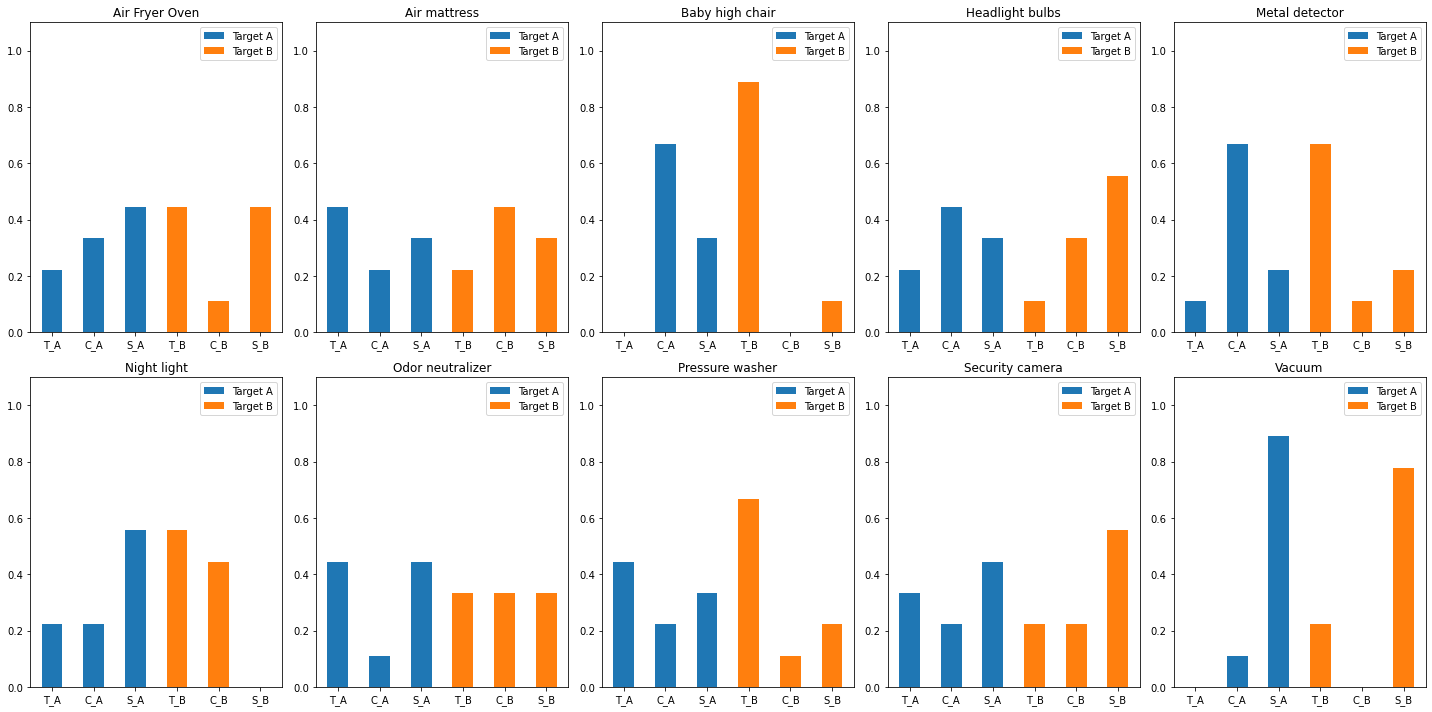

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A", "S_A"]
labels2 = ["T_B", "C_B", "S_B"]

n = Sim_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Sim_items_targets_A[counter], Sim_items_competitors_A[counter], Sim_items_decoys_A[counter]])
        y2 = np.array([Sim_items_targets_B[counter], Sim_items_competitors_B[counter], Sim_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Compromise Decoy

In [33]:
decoy_C_TargetA_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_A') | decoy_C_df['Option_2'].str.contains('C_A') | decoy_C_df['Option_3'].str.contains('C_A')]
decoy_C_TargetB_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_B') | decoy_C_df['Option_2'].str.contains('C_B') | decoy_C_df['Option_3'].str.contains('C_B')]

decoy_C_Items_TargetA_df = itemFreq_Decoy(decoy_C_TargetA_df, "Com_Decoy")
decoy_C_Items_TargetB_df = itemFreq_Decoy(decoy_C_TargetB_df, "Com_Decoy")

item_list = decoy_C_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Com_items_targets_A = np.array([])
Com_items_competitors_A = np.array([])
Com_items_decoys_A = np.array([])

Com_items_targets_B = np.array([])
Com_items_competitors_B = np.array([])
Com_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_C_Items_TargetA_df[decoy_C_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_C_Items_TargetB_df[decoy_C_Items_TargetB_df["Item"] == item]
    
    Com_items_targets_A = np.append(Com_items_targets_A, current_item_A["Target(%)"])
    Com_items_competitors_A = np.append(Com_items_competitors_A, current_item_A["Competitor(%)"])
    Com_items_decoys_A = np.append(Com_items_decoys_A, current_item_A["Com_Decoy(%)"])
    
    Com_items_targets_B = np.append(Com_items_targets_B, current_item_B["Target(%)"])
    Com_items_competitors_B = np.append(Com_items_competitors_B, current_item_B["Competitor(%)"])
    Com_items_decoys_B = np.append(Com_items_decoys_B, current_item_B["Com_Decoy(%)"])


In [34]:
decoy_C_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Com_Decoy(num),Target(%),Competitor(%),Com_Decoy(%)
0,Lawn mower,5,1,3,0.555556,0.111111,0.333333
1,Puree machine,9,0,0,1.000000,0.000000,0.000000
2,Mobility scooter,2,7,0,0.222222,0.777778,0.000000
3,Water heater,6,3,0,0.666667,0.333333,0.000000
4,White noise machine,1,6,2,0.111111,0.666667,0.222222
5,Pesticide,6,2,1,0.666667,0.222222,0.111111
6,Car vacuum,5,3,1,0.555556,0.333333,0.111111
7,Baby crib,5,1,3,0.555556,0.111111,0.333333
8,Insect repellent,2,7,0,0.222222,0.777778,0.000000
9,Smart lock,2,7,0,0.222222,0.777778,0.000000


In [35]:
decoy_C_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Com_Decoy(num),Target(%),Competitor(%),Com_Decoy(%)
0,Smart lock,5,0,4,0.555556,0.000000,0.444444
1,Insect repellent,4,1,4,0.444444,0.111111,0.444444
2,Baby crib,4,3,2,0.444444,0.333333,0.222222
3,Car vacuum,6,1,2,0.666667,0.111111,0.222222
4,Lawn mower,7,1,1,0.777778,0.111111,0.111111
5,Puree machine,8,0,1,0.888889,0.000000,0.111111
6,White noise machine,3,2,4,0.333333,0.222222,0.444444
7,Mobility scooter,2,0,7,0.222222,0.000000,0.777778
8,Pesticide,5,3,1,0.555556,0.333333,0.111111
9,Water heater,6,1,2,0.666667,0.111111,0.222222


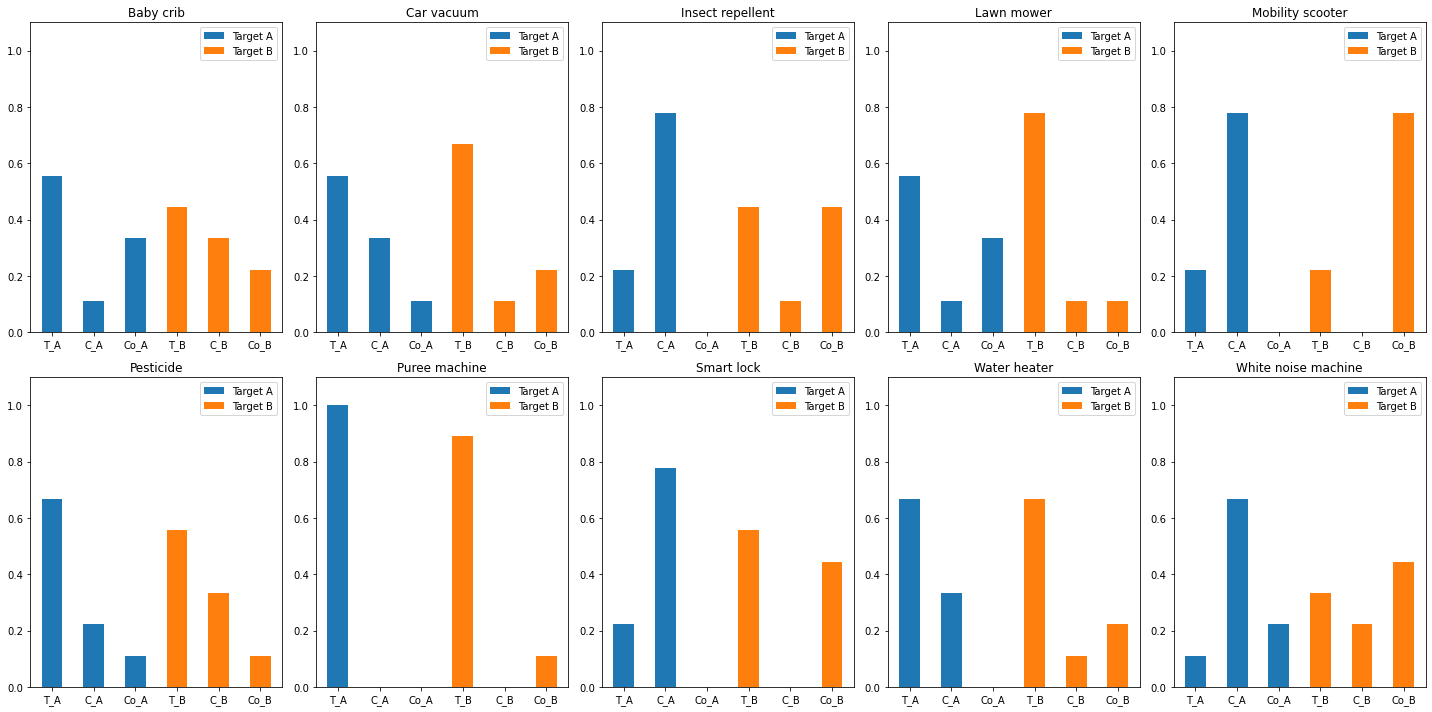

In [36]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A", "Co_A"]
labels2 = ["T_B", "C_B", "Co_B"]

n = Com_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Com_items_targets_A[counter], Com_items_competitors_A[counter], Com_items_decoys_A[counter]])
        y2 = np.array([Com_items_targets_B[counter], Com_items_competitors_B[counter], Com_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Attention Decoy

In [37]:
decoy_A_TargetA_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_A') | decoy_A_df['Option_2'].str.contains('A_A') | decoy_A_df['Option_3'].str.contains('A_A')]
decoy_A_TargetB_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_B') | decoy_A_df['Option_2'].str.contains('A_B') | decoy_A_df['Option_3'].str.contains('A_B')]

decoy_A_Items_TargetA_df = itemFreq_Decoy(decoy_A_TargetA_df, "Att_Decoy")
decoy_A_Items_TargetB_df = itemFreq_Decoy(decoy_A_TargetB_df, "Att_Decoy")

item_list = decoy_A_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Att_items_targets_A = np.array([])
Att_items_competitors_A = np.array([])
Att_items_decoys_A = np.array([])

Att_items_targets_B = np.array([])
Att_items_competitors_B = np.array([])
Att_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_A_Items_TargetA_df[decoy_A_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_A_Items_TargetB_df[decoy_A_Items_TargetB_df["Item"] == item]
    
    Att_items_targets_A = np.append(Att_items_targets_A, current_item_A["Target(%)"])
    Att_items_competitors_A = np.append(Att_items_competitors_A, current_item_A["Competitor(%)"])
    Att_items_decoys_A = np.append(Att_items_decoys_A, current_item_A["Att_Decoy(%)"])
    
    Att_items_targets_B = np.append(Att_items_targets_B, current_item_B["Target(%)"])
    Att_items_competitors_B = np.append(Att_items_competitors_B, current_item_B["Competitor(%)"])
    Att_items_decoys_B = np.append(Att_items_decoys_B, current_item_B["Att_Decoy(%)"])


In [38]:
decoy_A_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Att_Decoy(num),Target(%),Competitor(%),Att_Decoy(%)
0,Walker with seat,4,4,1,0.444444,0.444444,0.111111
1,Rash cream,1,8,0,0.111111,0.888889,0.000000
2,Leaf Blower,9,0,0,1.000000,0.000000,0.000000
3,Smart bulb,5,3,1,0.555556,0.333333,0.111111
4,Tire inflator,4,5,0,0.444444,0.555556,0.000000
5,Clothes Steamer,8,1,0,0.888889,0.111111,0.000000
6,Cloth diapers,4,4,1,0.444444,0.444444,0.111111
7,UV lamp,4,5,0,0.444444,0.555556,0.000000
8,Slow cooker,3,6,0,0.333333,0.666667,0.000000
9,Car seat,9,0,0,1.000000,0.000000,0.000000


In [39]:
decoy_A_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Att_Decoy(num),Target(%),Competitor(%),Att_Decoy(%)
0,Tire inflator,8,1,0,0.888889,0.111111,0.000000
1,UV lamp,5,3,1,0.555556,0.333333,0.111111
2,Cloth diapers,7,1,1,0.777778,0.111111,0.111111
3,Clothes Steamer,5,4,0,0.555556,0.444444,0.000000
4,Slow cooker,6,2,1,0.666667,0.222222,0.111111
5,Car seat,0,8,1,0.000000,0.888889,0.111111
6,Smart bulb,5,3,1,0.555556,0.333333,0.111111
7,Walker with seat,5,2,2,0.555556,0.222222,0.222222
8,Rash cream,9,0,0,1.000000,0.000000,0.000000
9,Leaf Blower,0,9,0,0.000000,1.000000,0.000000


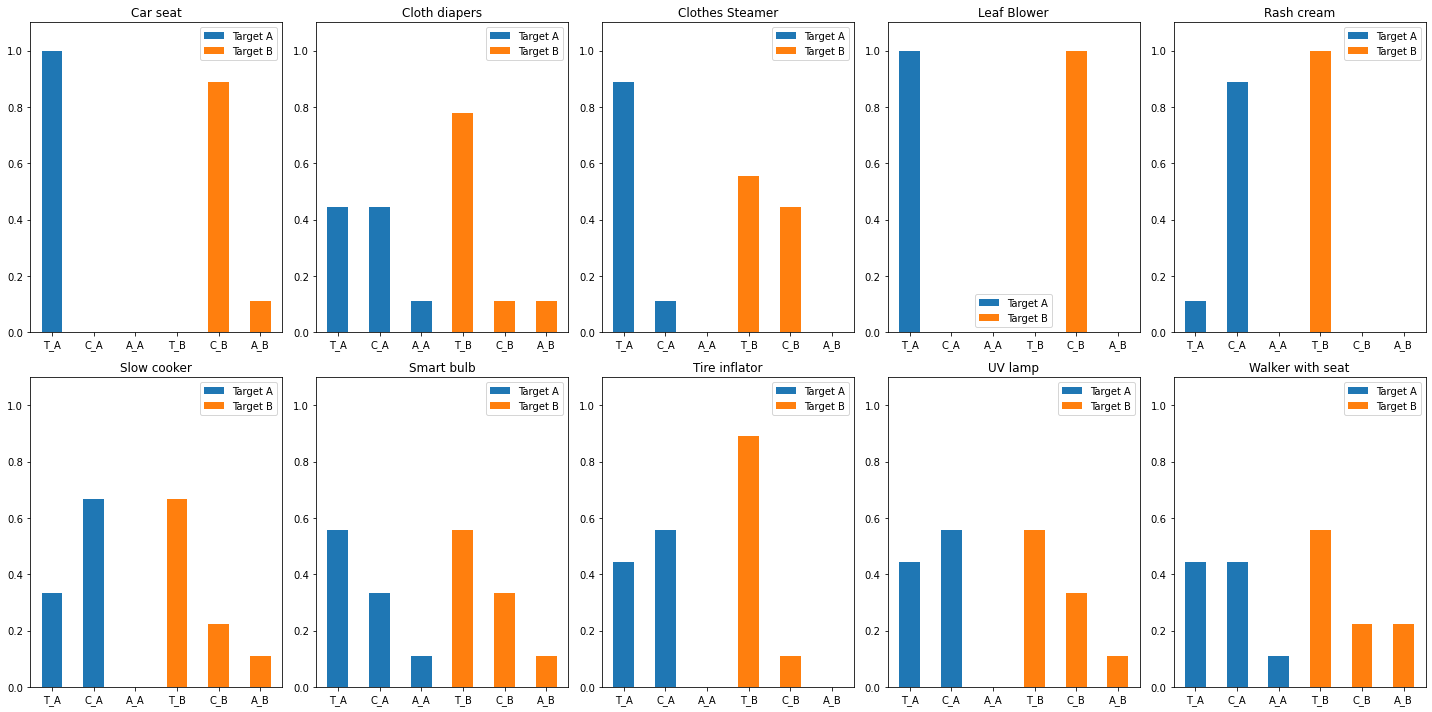

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A", "A_A"]
labels2 = ["T_B", "C_B", "A_B"]

n = Att_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Att_items_targets_A[counter], Att_items_competitors_A[counter], Att_items_decoys_A[counter]])
        y2 = np.array([Att_items_targets_B[counter], Att_items_competitors_B[counter], Att_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Phantom Decoy

In [41]:
decoy_P_TargetA_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_A') | decoy_P_df['Option_2'].str.contains('P_A') | decoy_P_df['Option_3'].str.contains('P_A')]
decoy_P_TargetB_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_B') | decoy_P_df['Option_2'].str.contains('P_B') | decoy_P_df['Option_3'].str.contains('P_B')]
decoy_P_Items_TargetA_df = itemFreq_PhantomDecoy(decoy_P_TargetA_df)
decoy_P_Items_TargetB_df = itemFreq_PhantomDecoy(decoy_P_TargetB_df)

item_list = decoy_P_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Phan_items_targets_A = np.array([])
Phan_items_competitors_A = np.array([])

Phan_items_targets_B = np.array([])
Phan_items_competitors_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_P_Items_TargetA_df[decoy_P_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_P_Items_TargetB_df[decoy_P_Items_TargetB_df["Item"] == item]
    
    Phan_items_targets_A = np.append(Phan_items_targets_A, current_item_A["Target(%)"])
    Phan_items_competitors_A = np.append(Phan_items_competitors_A, current_item_A["Competitor(%)"])
    
    Phan_items_targets_B = np.append(Phan_items_targets_B, current_item_B["Target(%)"])
    Phan_items_competitors_B = np.append(Phan_items_competitors_B, current_item_B["Competitor(%)"])

    

In [42]:
decoy_P_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Target(%),Competitor(%)
0,Oximeter,2,7,0.222222,0.777778
1,Air purifier,6,3,0.666667,0.333333
2,Electric mop,4,5,0.444444,0.555556
3,Baby stroller,3,6,0.333333,0.666667
4,Massage gun,2,7,0.222222,0.777778
5,Pill dispenser,2,7,0.222222,0.777778
6,Hearing aid,7,2,0.777778,0.222222
7,Wifi extender,7,2,0.777778,0.222222
8,Ride-on kids car,3,6,0.333333,0.666667
9,Paint sprayer,8,1,0.888889,0.111111


In [43]:
decoy_P_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Target(%),Competitor(%)
0,Pill dispenser,6,3,0.666667,0.333333
1,Hearing aid,4,5,0.444444,0.555556
2,Paint sprayer,4,5,0.444444,0.555556
3,Wifi extender,4,5,0.444444,0.555556
4,Massage gun,8,1,0.888889,0.111111
5,Ride-on kids car,9,0,1.000000,0.000000
6,Electric mop,3,6,0.333333,0.666667
7,Oximeter,9,0,1.000000,0.000000
8,Air purifier,7,2,0.777778,0.222222
9,Baby stroller,7,2,0.777778,0.222222


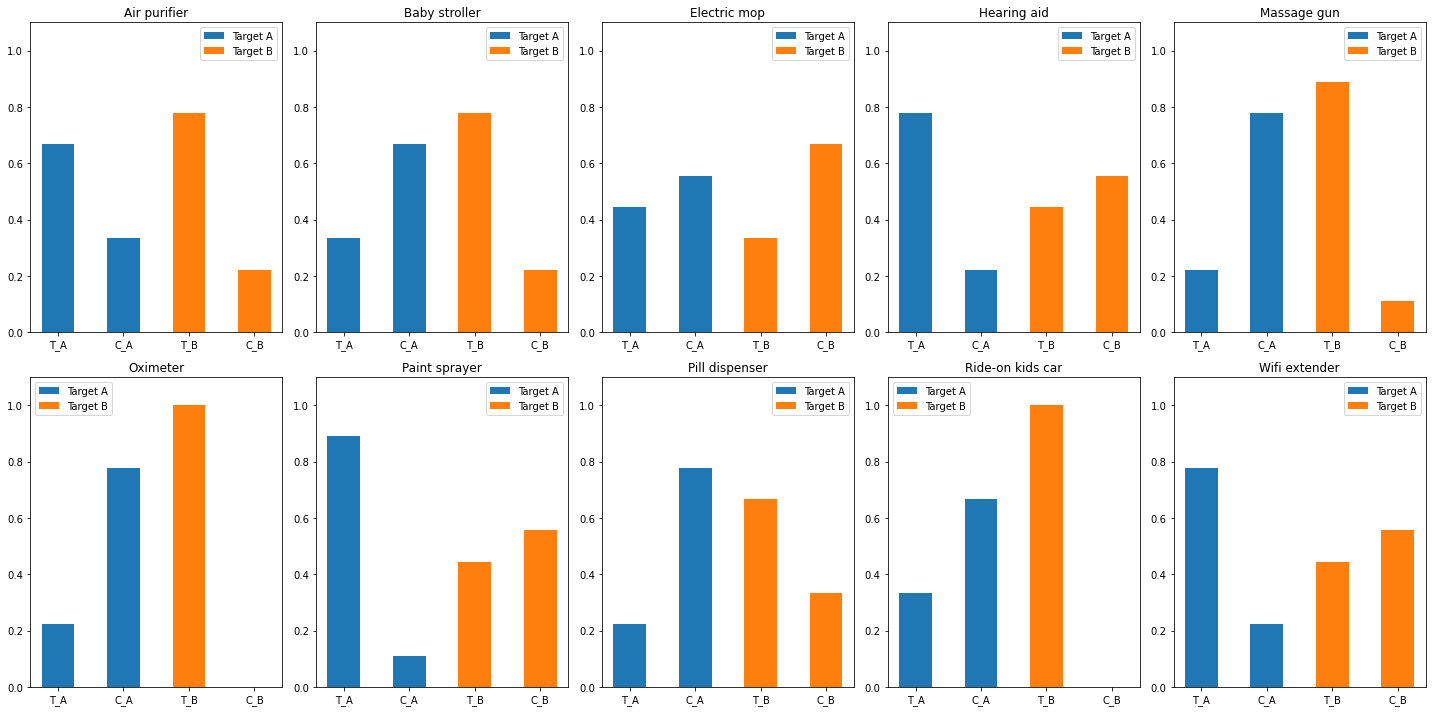

In [44]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A"]
labels2 = ["T_B", "C_B"]

n = item_list.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Phan_items_targets_A[counter], Phan_items_competitors_A[counter]])
        y2 = np.array([Phan_items_targets_B[counter], Phan_items_competitors_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Which items fail to display decoy effects?


In [45]:
# To detect which items might need to be replaced, I will look into the decoy effects that are working as expected. 
# In these, I will look for the items that produce counter-expected(inverse) results or show that one dimension
# is consistently overvalued (compared to the other dimension).

def accessing_dfs_ratio(df, item): 
    try: 
        target = df[df["Item"] == item]["Target(%)"]
        competitor = df[df["Item"] == item]["Competitor(%)"]
        #print(item)
        ratio = float(target - competitor)
        #ratio = ratio*100
    except:
        ratio = 0
    return ratio

def accessing_dfs_freq(df, item, decoy):
    try:
        target_freq = float(df[df["Item"] == item]["Target(freq)"])
        competitor_freq = float(df[df["Item"] == item]["Competitor(freq)"])
        if(decoy == "Att"):
            decoy_freq = float(df[df["Item"] == item]["Att_Decoy(freq)"])
        elif (decoy == "Com"):
            decoy_freq = float(df[df["Item"] == item]["Com_Decoy(freq)"])
        else: 
            print("Error! Wrong df.")
    except:
        target_freq = 0
        competitor_freq = 0
        decoy_freq = 0
    total_freq = target_freq + competitor_freq + decoy_freq
    return total_freq
        

In [46]:
#decoy_A_Items_TargetA_df[decoy_A_Items_TargetA_df["Item"] == "Air Fryer Oven"].head() #["Target(%)"] 
#df[df["Item"] == item]["Target(freq)"]
#print(decoy_C_Items_TargetA_df[decoy_C_Items_TargetA_df["Item"] == "Mobility scooter"]["Target(%)"])

#for item in items_list:

    #Att_A = accessing_dfs(decoy_A_Items_TargetA_df, item)
    
#decoy_A_Items_TargetA_df.head(40)


In [47]:

inspecting_items_df = pd.DataFrame(columns=['Item', 'Att_A', "Att_B", "Att_num", "Com_A", "Com_B", "Com_num"]) # "Sim_A", "Sim_B"

items_list = decoy_A_Items_TargetA_df["Item"].unique() 
items_list = np.append(items_list, decoy_A_Items_TargetB_df["Item"].unique())
items_list = np.append(items_list, decoy_C_Items_TargetA_df["Item"].unique())
items_list = np.append(items_list, decoy_C_Items_TargetB_df["Item"].unique())
items_list = np.unique(items_list)        

for item in items_list:
    #print(item)
    Att_A = round(accessing_dfs_ratio(decoy_A_Items_TargetA_df, item), 2)
    Att_B = round(accessing_dfs_ratio(decoy_A_Items_TargetB_df, item), 2)
    Com_A = round(accessing_dfs_ratio(decoy_C_Items_TargetA_df, item), 2)
    Com_B = round(accessing_dfs_ratio(decoy_C_Items_TargetB_df, item), 2)
    
    Att_freq_A = accessing_dfs_freq(decoy_A_Items_TargetA_df, item, "Att")
    Att_freq_B = accessing_dfs_freq(decoy_A_Items_TargetB_df, item, "Att")
    Com_freq_A = accessing_dfs_freq(decoy_C_Items_TargetA_df, item, "Com")
    Com_freq_B = accessing_dfs_freq(decoy_C_Items_TargetB_df, item, "Com")
    
    Att_freq = Att_freq_A + Att_freq_B
    Com_freq = Com_freq_A + Com_freq_B
    
    current_item = pd.DataFrame(data={"Item": item, "Att_A": Att_A, "Att_B": Att_B, "Att_num": Att_freq, "Com_A": Com_A, "Com_B": Com_B, "Com_num": Com_freq}, index=range(1))
    inspecting_items_df = inspecting_items_df.append(current_item, ignore_index = True)

inspecting_items_df.head(40)


,Item,Att_A,Att_B,Att_num,Com_A,Com_B,Com_num
0,Baby crib,0,0,0,0.44,0.11,0
1,Car seat,1.0,-0.89,0,0.00,0.00,0
2,Car vacuum,0,0,0,0.22,0.56,0
3,Cloth diapers,0.0,0.67,0,0.00,0.00,0
4,Clothes Steamer,0.78,0.11,0,0.00,0.00,0
5,Insect repellent,0,0,0,-0.56,0.33,0
6,Lawn mower,0,0,0,0.44,0.67,0
7,Leaf Blower,1.0,-1.0,0,0.00,0.00,0
8,Mobility scooter,0,0,0,-0.56,0.22,0
9,Pesticide,0,0,0,0.44,0.22,0


#### Notes about items (Which are good and which might need to be changed?): 

In [48]:
# Items that show that display strong Attraction and Compromise Decoy effects:
# - Ride-on kids car: 0.50, 1.00, 1.00, 1.00
# - UV lamp: 1.00, 1.00, 0.50, 0.00

# Items that are failing to display Attraction and Compromise Decoy effects: 
# - Baby high chair:-1.00, 1.00, -1.00, 0.25
# - Car seat: 1.00, -1.00, 1.00, -0.67
# - Car vacuum: -1.00, 1.00, 0.50, 0.00
# - Clothes Steamer: 1.00, -0.33, 1.00, -1.00
# - Insect repellent: 1.00, -1.00, -1.00, 1.00
# - Metal detector: -0.25, 1.00, -0.33, 0.67
# - Pill dispenser: -0.33, 0.33, -1.00, -0.33
# - Smart bulb: 0.33, -0.67, 0.00, 1.00
# - Smart lock: -1.00, 0.25, -1.00, 0.33
# - Vacuum: 1.00, -1.00, 1.00, -1.00
# - White noise machine: -0.50, 0.50, 0.00, 1.00

# Having a (-1.00) and a (1.00) within the same decoy effect, means one attribute is totally domination another. 
# Having a (-1.00) means one attribute (the attribute favoring the competitor) totally dominates the 
# alternative attribute.
# Having (0.00) when target A or B (_A, _B) can mean several things. One is that this item hasn't been presented in
# this type of decoy.


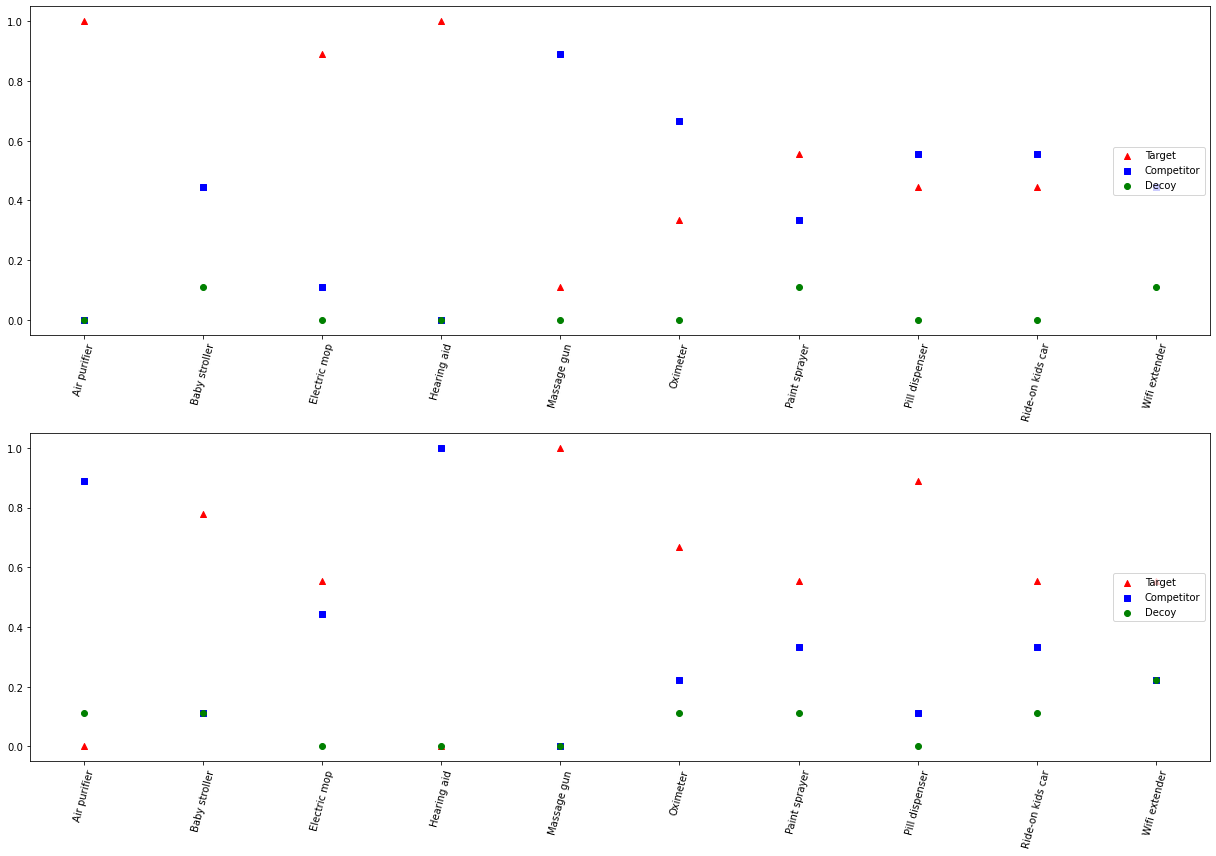

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(17, 12))

ax[0].scatter(item_list, Att_items_targets_A, c="red", marker="^", label="Target")
ax[0].scatter(item_list, Att_items_competitors_A, c="blue", marker="s", label="Competitor")
ax[0].scatter(item_list, Att_items_decoys_A, c="green", marker="o", label="Decoy")
for tick in ax[0].get_xticklabels():
    tick.set_rotation(75)
ax[0].legend(loc='center right')

ax[1].scatter(item_list, Att_items_targets_B, c="red", marker="^", label="Target")
ax[1].scatter(item_list, Att_items_competitors_B, c="blue", marker="s", label="Competitor")
ax[1].scatter(item_list, Att_items_decoys_B, c="green", marker="o", label="Decoy")
for tick in ax[1].get_xticklabels():
    tick.set_rotation(75)
ax[1].legend(loc='center right')

plt.tight_layout()

## Post-Experiment Explanatory Display (For Participants)

### Similarity Decoy

In [50]:
title1 = "Similarity Decoy"
title2 = "Similarity Target A"
title3 = "Similarity Target B"

target = target_S 
competitor = competitor_S 
decoy = decoy_S

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([8.1, 6.1])
decoy1_title = "S_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7.5, 9)
ax[1].set_ylim(4, 7)
ax[1].annotate(text="", xy=(8.55, 4.7), xytext=(8.3, 6), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="S_A increase the \nselection of B", xy=(8.4, 5.7))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([8.4, 4.8])
decoy2_title = "S_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.5, 9)
ax[2].set_ylim(3.9, 7)
ax[2].annotate(text="", xy=(8.15, 6.5), xytext=(8.45, 5.1), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="S_B increase the \nselection of A", xy=(8.45, 5.3))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  


NameError: name 'target_S' is not defined

### Compromise Decoy


In [ ]:
title1 = "Compromise Decoy"
title2 = "Compromise Target A"
title3 = "Compromise Target B"

target = target_C 
competitor = competitor_C 
decoy = decoy_C

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([7.5, 9.0])
decoy1_title = "C_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7, 9)
ax[1].set_ylim(2, 10)
ax[1].annotate(text="", xy=(8.0, 7.3), xytext=(7.75, 8.85), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="C_A increases \nselection of A", xy=(7.8, 9))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([9.0, 2.0])
decoy2_title = "C_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.5, 10)
ax[2].set_ylim(0, 8)
ax[2].annotate(text="", xy=(8.65, 4.1), xytext=(9., 2.5), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="C_B increase \nselection of B", xy=(9, 3.2))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  

### Attraction Decoy


In [ ]:
title1 = "Attraction Decoy"
title2 = "Attraction Target A"
title3 = "Attraction Target B"

data_att_tar = group_att_freq_df["Target(%)"].std()
data_att_comp = group_att_freq_df["Competitor(%)"].std()
data_att_dec = group_att_freq_df["Att_Decoy(%)"].std()
data_att_stds = np.array([data_att_tar, data_att_comp, data_att_dec])

target = round(group_att_freq_df["Target(%)"].mean(), 2)
competitor = round(group_att_freq_df["Competitor(%)"].mean(), 2)
decoy = round(group_att_freq_df["Att_Decoy(%)"].mean(), 2)

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9, yerr=data_att_stds, capsize=8)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([8.0, 5.5])
decoy1_title = "A_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7.8, 8.7)
ax[1].set_ylim(4, 7)
ax[1].annotate(text="", xy=(8.15, 6.5), xytext=(8.55, 4.6), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="A_A increases \nselection of A", xy=(8.4, 6))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([8.25, 4.33])
decoy2_title = "A_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.8, 8.7)
ax[2].set_ylim(4, 7)
ax[2].annotate(text="", xy=(8.55, 4.6), xytext=(8.09, 6.6), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="A_B increase \nselection of B", xy=(8.3, 6.4))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  

In [ ]:
"""
# Phantom Decoy 

decoy_P_df = all_responses[all_responses["Decoy"] == "P"]
decoy_P_df = decoy_P_df.reset_index()
m, n = decoy_P_df.shape 

target_P = 0
competitor_P = 0
decoy_P = 0

for x in range(m):
    option_1 = decoy_P_df["Option_1"][x]
    option_2 = decoy_P_df["Option_2"][x]
    option_3 = decoy_P_df["Option_3"][x]
    choice = decoy_P_df["Choice"][x]
    if((option_1 == "P_A") or (option_2 == "P_A") or (option_3 == "P_A")):
        if(choice == "A"):
            target_P = target_P + 1
        elif(choice == "B"):
            competitor_P = competitor_P + 1
    elif((option_1 == "P_B") or (option_2 == "P_B") or (option_3 == "P_B")):
        if(choice == "B"):
            target_P = target_P + 1
        elif(choice == "A"):
            competitor_P = competitor_P + 1

target_P = target_P/m
competitor_P = competitor_P/m
decoy_P = decoy_P/m
print("Target: " + str(target_P))
print("Competitor: " + str(competitor_P))
print("Decoy: " + str(decoy_P))

barGraphDecoys(target_P, competitor_P, decoy_P, 'Phantom Decoy')

"""

In [ ]:
"""
target_P_HD = 0
competitor_P_HD = 0

target_P_WD = 0
competitor_P_WD = 0

target_P_U = 0
competitor_P_U = 0

decoy_P_HD_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"].shape[0]
decoy_P_WD_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"].shape[0]
decoy_P_U_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"].shape[0]

for x in range(m):
    option_1 = decoy_P_df["Option_1"][x]
    option_2 = decoy_P_df["Option_2"][x]
    option_3 = decoy_P_df["Option_3"][x]
    choice = decoy_P_df["Choice"][x]

    if(decoy_P_df["PhantomCondition"][x] == "Highly_desirable"):
        target_P_HD, competitor_P_HD = phantom_choices(option_1, option_2, option_3, choice, target_P_HD, competitor_P_HD)
    elif(decoy_P_df["PhantomCondition"][x] == "Weakly_desirable"):
        target_P_WD, competitor_P_WD = phantom_choices(option_1, option_2, option_3, choice, target_P_WD, competitor_P_WD)
    elif(decoy_P_df["PhantomCondition"][x] == "Undesirable"):
        target_P_U, competitor_P_U = phantom_choices(option_1, option_2, option_3, choice, target_P_U, competitor_P_U)
    else:
        print("Error.")      

target_P_HD = target_P_HD/decoy_P_HD_count
competitor_P_HD = competitor_P_HD/decoy_P_HD_count

target_P_WD = target_P_WD/decoy_P_WD_count
competitor_P_WD = competitor_P_WD/decoy_P_WD_count

target_P_U = target_P_U/decoy_P_U_count
competitor_P_U = competitor_P_U/decoy_P_U_count
        
print("Target HD: " + str(target_P_HD))
print("Competitor HD: " + str(competitor_P_HD))

print("Target WD: " + str(target_P_WD))
print("Competitor WD: " + str(competitor_P_WD))

print("Target U: " + str(target_P_U))
print("Competitor U: " + str(competitor_P_U))
"""

In [ ]:
"""

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

print(Att_items_targets_A[0])
print(Att_items_competitors_A[0])
print(Att_items_decoys_A[0])
print(Att_items_targets_B[0])
print(Att_items_competitors_B[0])
print(Att_items_decoys_B[0])
print(item_list[0])
print(Att_items_targets_A.shape)
print(Att_items_targets_B.shape)
labels1 = ["T_A", "C_A", "AA_A"]
labels2 = ["T_B", "C_B", "AA_B"]
y1 = np.array([Att_items_targets_A[0], Att_items_competitors_A[0], Att_items_decoys_A[0]])
y2 = np.array([Att_items_targets_B[0], Att_items_competitors_B[0], Att_items_decoys_B[0]])

ax.bar(labels1, y1, 0.75, capsize=8, label="Target A")
ax.bar(labels2, y2, 0.75, capsize=8, label="Target B")
ax.legend()
ax.set_ylim(0, 1.1)
ax.set_ylabel('Percentage')
ax.set_title(item_list[0])

"""

In [ ]:
"""
,,,F,,,,,,F,,F,,,,,,,,F,,,,F,,,,F,,,
F,,,,,,,F,,,,,,F,,,,,F,,,F,,,,,F,,,,
,,F,,,,,,,F,,,,F,,,,,F,,,F,,,,F,,,,,
,,,F,,F,,,,

29:A,34:S,12:P,3:C,18:S,24:P,7:C,9:A,33:A,4:P,
6:S,27:C,35:C,5:A,28:P,22:S,11:C,32:P,2:S,21:A,
1:A,23:C,10:S,16:P,15:C,38:S,13:A,8:P,0:P,14:S,
31:C,25:A,37:A,19:C,26:S,36:P,30:S,39:C,17:A,20:P,
1:A,24:P,26:S,35:C,34:S,19:C,4:P,29:A,30:S,39:C,16:P,
33:A,32:P,37:A,14:S,11:C,6:S,27:C,0:P,5:A,36:P,22:S,
21:A,15:C,18:S,31:C,17:A,8:P,25:A,10:S,20:P,7:C,38:S,
3:C,9:A,12:P,28:P,13:A,2:S,23:C

"""